# Dataloaders using Medicaltorch
In this notebook we are going to explore a medical imaging open-source library known as MedicalTorch, which was built on top of PyTorch.

The purpose of this tutorial is how to create a DataLoader using medicaltorch for medical dataset containing data in NIFTI format. For the purpose of this we will be using the Cardiac MRI dataset.

The Dataset is available as a part of pastly held MedicalDecathlon and can be downloaded from here

This tutorial assumes you have installed the medicaltorch library. If you haven't please take a look at this notebook

Importing Libraries and Let's Get Started!
Let's import the necessary libraries includinf the utility functions from the medicaltorch library.

# Importing Libraries and Let's Get Started! Let's import the necessary libraries includinf the utility functions from the medicaltorch library.

In [1]:
import numpy as np
import os

from medicaltorch import datasets as mt_datasets
from medicaltorch import transforms as mt_transforms

import torch
from torchvision import transforms
from torch.utils.data import DataLoader
from torch import autograd, optim
import torch.backends.cudnn as cudnn
import torch.nn as nn

import torchvision.utils as vutils

cudnn.benchmark = True
import matplotlib.pyplot as plt
%matplotlib inline

# Data Exploration
Before we do any modeling stuff, let's investigate our data first. Let's look at one sample (MRI image) from the dataset.

We will see the preprocessing module mt_datasets.SegmentationPair2D which is used to read and format the data in a way that we can better explore it in our environment. See the example below.

In [6]:
#ROOT_DIR = "../Datasets/Task02_Heart/"
ROOT_DIR = "C:\\Users\\moona\\Desktop\\VeryVeryImUnet\\medicaltorch-master\\medicaltorch-master\\Task02_Heart"
mri_input_filename = os.path.join(ROOT_DIR,'imagesTr',
                                          'la_004.nii.gz')
mri_gt_filename = "C:\\Users\\moona\\Desktop\\VeryVeryImUnet\\medicaltorch-master\\medicaltorch-master\\Task02_Heart\\labelsTr\\la_004.nii.gz"

pair = mt_datasets.SegmentationPair2D(mri_input_filename, mri_gt_filename)
slice_pair = pair.get_pair_slice(55)
input_slice = slice_pair["input"]
gt_slice = slice_pair["gt"]

In [7]:
print(input_slice.shape)
print(gt_slice.shape)

(320, 320)
(320, 320)


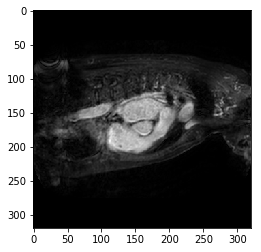

In [8]:
img = input_slice
plt.imshow(img,cmap = 'gray')
plt.show()

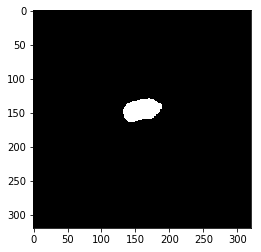

In [9]:
img = gt_slice
plt.imshow(img,cmap = 'gray')
plt.show()

# The SegmentationPair2D class gives us a easy-to use wrapper for Analyzing the NIFTI images and thier corresponding segmentation mask.

The 2 most frequently used methods are

get_pair_slice - This method is used to fetch a particular slice from the NIFT image. We can also pass the desired axis (Axial,coronal,Sagittal) to view the image

get_pair_data- This method is used to fetch the entire image/pixel data and gives us a tuple containing image and mask data

In [10]:
img_data,seg_data = pair.get_pair_data()

In [12]:
print(img_data.shape)
print(seg_data.shape)

(320, 320, 110)
(320, 320, 110)


# As you can see we got the entire image and label tensor by using the get_pair_data method



# Creating a Dataset for 2D segmentation (slice-wise)
Next we will see how we can create a Dataset using the NIFTI images.

medicaltorch library has a built in generic Dataset called MRI2DSegmentationDataset for this purpose. This dataset takes a tuple of input images and thier labels.

In [13]:
img_list = os.listdir(os.path.join(ROOT_DIR,'imagesTr'))
label_list = os.listdir(os.path.join(ROOT_DIR,'labelsTr'))

In [14]:
filename_pairs = [(os.path.join(ROOT_DIR,'imagesTr',x),os.path.join(ROOT_DIR,'labelsTr',y)) for x,y in zip(img_list,label_list)]

In [17]:
for x,y in zip(img_list,label_list):
    print(x)
    print(y)

la_003.nii.gz
la_003.nii.gz
la_004.nii.gz
la_004.nii.gz
la_005.nii.gz
la_005.nii.gz
la_007.nii.gz
la_007.nii.gz
la_009.nii.gz
la_009.nii.gz
la_010.nii.gz
la_010.nii.gz
la_011.nii.gz
la_011.nii.gz
la_014.nii.gz
la_014.nii.gz
la_016.nii.gz
la_016.nii.gz
la_017.nii.gz
la_017.nii.gz
la_018.nii.gz
la_018.nii.gz
la_019.nii.gz
la_019.nii.gz
la_020.nii.gz
la_020.nii.gz
la_021.nii.gz
la_021.nii.gz
la_022.nii.gz
la_022.nii.gz
la_023.nii.gz
la_023.nii.gz
la_024.nii.gz
la_024.nii.gz
la_026.nii.gz
la_026.nii.gz
la_029.nii.gz
la_029.nii.gz
la_030.nii.gz
la_030.nii.gz


In [15]:
filename_pairs

[('C:\\Users\\moona\\Desktop\\VeryVeryImUnet\\medicaltorch-master\\medicaltorch-master\\Task02_Heart\\imagesTr\\la_003.nii.gz',
  'C:\\Users\\moona\\Desktop\\VeryVeryImUnet\\medicaltorch-master\\medicaltorch-master\\Task02_Heart\\labelsTr\\la_003.nii.gz'),
 ('C:\\Users\\moona\\Desktop\\VeryVeryImUnet\\medicaltorch-master\\medicaltorch-master\\Task02_Heart\\imagesTr\\la_004.nii.gz',
  'C:\\Users\\moona\\Desktop\\VeryVeryImUnet\\medicaltorch-master\\medicaltorch-master\\Task02_Heart\\labelsTr\\la_004.nii.gz'),
 ('C:\\Users\\moona\\Desktop\\VeryVeryImUnet\\medicaltorch-master\\medicaltorch-master\\Task02_Heart\\imagesTr\\la_005.nii.gz',
  'C:\\Users\\moona\\Desktop\\VeryVeryImUnet\\medicaltorch-master\\medicaltorch-master\\Task02_Heart\\labelsTr\\la_005.nii.gz'),
 ('C:\\Users\\moona\\Desktop\\VeryVeryImUnet\\medicaltorch-master\\medicaltorch-master\\Task02_Heart\\imagesTr\\la_007.nii.gz',
  'C:\\Users\\moona\\Desktop\\VeryVeryImUnet\\medicaltorch-master\\medicaltorch-master\\Task02_Heart\

In [18]:
# load data
train_dataset = mt_datasets.MRI2DSegmentationDataset(filename_pairs,transform=mt_transforms.ToTensor())

In [19]:
type(train_dataset)

medicaltorch.datasets.MRI2DSegmentationDataset

In [20]:
print(len(train_dataset))

2271


# We can check the invidiaul elements of the train_dataset by following

In [25]:
# sample of the training dataset
train_dataset[2270]

{'input': tensor([[[   0.,    0.,    0.,  ...,    0.,    0.,    0.],
          [   0.,    0.,    0.,  ...,    0.,    0.,    0.],
          [   0.,    0.,    0.,  ...,    0.,    0.,    0.],
          ...,
          [   0.,    0.,    0.,  ...,    0.,    0.,    0.],
          [   0.,    0.,    0.,  ...,    0.,    0.,    0.],
          [   0.,    0.,    0.,  ...,    0.,    0.,    0.]]]),
 'gt': tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 'input_metadata': <medicaltorch.datasets.SampleMetadata at 0x2466701dda0>,
 'gt_metadata': <medicaltorch.datasets.SampleMetadata at 0x2466701dc50>}

# The next step is to create a PyTorch Dataloader over this Dataset and let PyTorch do its magic

In [26]:
# PyTorch data loader
dataloader = DataLoader(train_dataset, batch_size=2,collate_fn=mt_datasets.mt_collate)
batch = next(iter(dataloader))

In [27]:
batch

{'input': tensor([[[[  0.,   0.,   0.,  ...,   0.,   0.,   0.],
           [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
           [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
           ...,
           [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
           [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
           [  0.,   0.,   0.,  ...,   0.,   0.,   0.]]],
 
 
         [[[  0.,   0.,   0.,  ...,   0.,   0.,   0.],
           [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
           [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
           ...,
           [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
           [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
           [  0.,   0.,   0.,  ...,   0.,   0.,   0.]]]]),
 'gt': tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
   

# The minibatch is basically a dictionary with the relevant image and segment data as well as metadata.

In [28]:
# check minibatch size
batch['input'].size()

torch.Size([2, 1, 320, 320])

In [29]:
batch['gt'].size()

torch.Size([2, 1, 320, 320])

# Lets visualize the batches

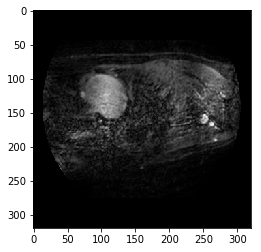

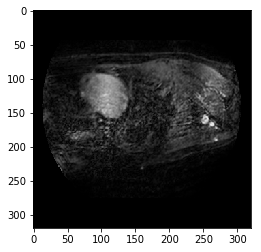

In [30]:
for item in batch['input']:
    plt.imshow(item.squeeze(0),cmap = 'gray')
    plt.show()

# Using built in Transformations
We will now see how we can use the prebuilt transformations available in medicaltorch in creation of data loaders. 
In addition to the normal torchvision dataloaders there are some specific transforms that we can see

mt_transforms.ElasticTransform applies both local distortion and random affine transformation. More about this transformation can be found at Simard, Patrice Y., David Steinkraus, and John C. Platt. "Best practices for convolutional neural networks applied to visual document analysis." ICDAR. Vol. 3. 2003.

A visualization of the transformation can be also seen here

In [31]:
train_transform = transforms.Compose([
        mt_transforms.Resample(0.25, 0.25),
        mt_transforms.ElasticTransform(alpha_range=(40.0, 60.0),
                                       sigma_range=(2.5, 4.0),
                                       p=0.3),
        mt_transforms.ToTensor()]
)

In [32]:
train_dataset = mt_datasets.MRI2DSegmentationDataset(filename_pairs,transform=train_transform)

# Now lets analyze whether we are able to see the transformation getting applied or not ?

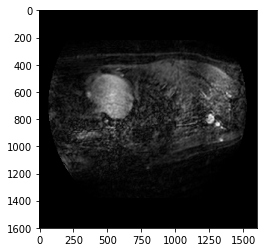

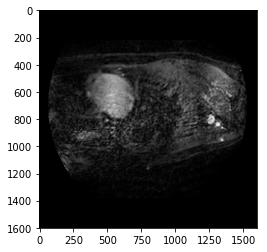

In [33]:
dataloader = DataLoader(train_dataset, batch_size=2,collate_fn=mt_datasets.mt_collate)
batch = next(iter(dataloader))
for item in batch['input']:
    plt.imshow(item.squeeze(0),cmap = 'gray')
    plt.show()

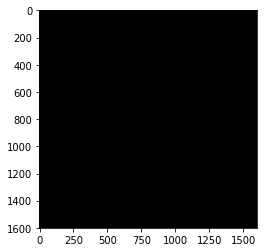

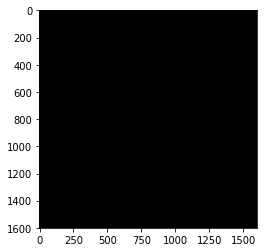

In [34]:
for item in batch['gt']:
    plt.imshow(item.squeeze(0),cmap = 'gray')
    plt.show()

# Dataloaders using Medicaltorch
In this notebook we are going to explore a medical imaging open-source library known as MedicalTorch, which was built on top of PyTorch.

The purpose of this tutorial is how to create a DataLoader using medicaltorch for medical dataset containing data in NIFTI format. For the purpose of this we will be using the Cardiac MRI dataset.

The Dataset is available as a part of pastly held MedicalDecathlon and can be downloaded from here

This tutorial assumes you have installed the medicaltorch library. If you haven't please take a look at this notebook

Importing Libraries and Let's Get Started! Let's import the necessary libraries includinf the utility functions from the medicaltorch library.

Importing Libraries and Let's Get Started! Let's import the necessary libraries includinf the utility functions from the medicaltorch library.¶

In [2]:
import numpy as np
import os

from medicaltorch import datasets as mt_datasets
from medicaltorch import transforms as mt_transforms

import torch
from torchvision import transforms
from torch.utils.data import DataLoader
from torch import autograd, optim
import torch.backends.cudnn as cudnn
import torch.nn as nn

import torchvision.utils as vutils

cudnn.benchmark = True
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Data Exploration
Before we do any modeling stuff, let's investigate our data first. Let's look at one sample (MRI image) from the dataset.

We will see the preprocessing module mt_datasets.SegmentationPair2D which is used to read and format the data in a way that we can better explore it in our environment. See the example below.

SyntaxError: invalid syntax (<ipython-input-3-726f3aa02988>, line 2)

In [ ]:
#ROOT_DIR = "../Datasets/Task02_Heart/"
ROOT_DIR = "C:\\Users\\moona\\Desktop\\VeryVeryImUnet\\medicaltorch-master\\medicaltorch-master\\Task05_Prostate\\Task05_Prostate"
mri_input_filename = os.path.join(ROOT_DIR,'imagesTr',
                                          'prostate_04.nii.gz')
mri_gt_filename = "C:\\Users\\moona\\Desktop\\VeryVeryImUnet\\medicaltorch-master\\medicaltorch-master\\Task05_Prostate\\Task05_Prostate\\labelsTr\\prostate_04.nii.gz"

pair = mt_datasets.SegmentationPair2D(mri_input_filename, mri_gt_filename)
slice_pair = pair.get_pair_slice(55)
input_slice = slice_pair["input"]
gt_slice = slice_pair["gt"]

In [5]:
#ROOT_DIR = "../Datasets/Task02_Heart/"
ROOT_DIR = "C:\\Users\\moona\\Desktop\\VeryVeryImUnet\\medicaltorch-master\\medicaltorch-master\\Task04_Hippocampus\\Task04_Hippocampus"
mri_input_filename = os.path.join(ROOT_DIR,'imagesTr',
                                          'hippocampus_006.nii.gz')
mri_gt_filename = "C:\\Users\\moona\\Desktop\\VeryVeryImUnet\\medicaltorch-master\\medicaltorch-master\\Task04_Hippocampus\\Task04_Hippocampus\\labelsTr\\hippocampus_006.nii.gz"

pair = mt_datasets.SegmentationPair2D(mri_input_filename, mri_gt_filename)
slice_pair = pair.get_pair_slice(10)
input_slice = slice_pair["input"]
gt_slice = slice_pair["gt"]

In [6]:
print(input_slice.shape)
print(gt_slice.shape)

(35, 52)
(35, 52)


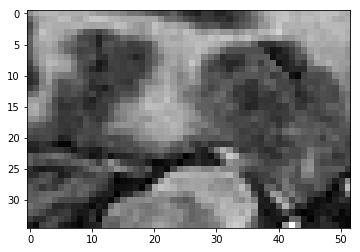

In [7]:
img = input_slice
plt.imshow(img,cmap = 'gray')
plt.show()

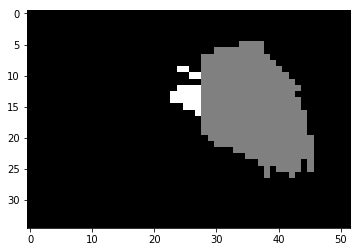

In [8]:
img = gt_slice
plt.imshow(img,cmap = 'gray')
plt.show()

In [9]:
img_data,seg_data = pair.get_pair_data()

In [10]:
print(img_data.shape)
print(seg_data.shape)

(35, 52, 34)
(35, 52, 34)


In [11]:
img_list = os.listdir(os.path.join(ROOT_DIR,'imagesTr'))
label_list = os.listdir(os.path.join(ROOT_DIR,'labelsTr'))

In [12]:
filename_pairs = [(os.path.join(ROOT_DIR,'imagesTr',x),os.path.join(ROOT_DIR,'labelsTr',y)) for x,y in zip(img_list,label_list)]

In [13]:
filename_pairs

[('C:\\Users\\moona\\Desktop\\VeryVeryImUnet\\medicaltorch-master\\medicaltorch-master\\Task04_Hippocampus\\Task04_Hippocampus\\imagesTr\\hippocampus_001.nii.gz',
  'C:\\Users\\moona\\Desktop\\VeryVeryImUnet\\medicaltorch-master\\medicaltorch-master\\Task04_Hippocampus\\Task04_Hippocampus\\labelsTr\\hippocampus_001.nii.gz'),
 ('C:\\Users\\moona\\Desktop\\VeryVeryImUnet\\medicaltorch-master\\medicaltorch-master\\Task04_Hippocampus\\Task04_Hippocampus\\imagesTr\\hippocampus_003.nii.gz',
  'C:\\Users\\moona\\Desktop\\VeryVeryImUnet\\medicaltorch-master\\medicaltorch-master\\Task04_Hippocampus\\Task04_Hippocampus\\labelsTr\\hippocampus_003.nii.gz'),
 ('C:\\Users\\moona\\Desktop\\VeryVeryImUnet\\medicaltorch-master\\medicaltorch-master\\Task04_Hippocampus\\Task04_Hippocampus\\imagesTr\\hippocampus_004.nii.gz',
  'C:\\Users\\moona\\Desktop\\VeryVeryImUnet\\medicaltorch-master\\medicaltorch-master\\Task04_Hippocampus\\Task04_Hippocampus\\labelsTr\\hippocampus_004.nii.gz'),
 ('C:\\Users\\moona

In [14]:
# load data
train_dataset = mt_datasets.MRI2DSegmentationDataset(filename_pairs,transform=mt_transforms.ToTensor())

In [15]:
type(train_dataset)

medicaltorch.datasets.MRI2DSegmentationDataset

In [16]:
print(len(train_dataset))

9270


In [17]:
# sample of the training dataset
train_dataset[0]

{'input': tensor([[[ 42.,  37.,  30.,  ..., 101.,  92.,  63.],
          [ 39.,  38.,  42.,  ..., 100.,  98.,  91.],
          [ 43.,  49.,  43.,  ...,  67.,  81.,  98.],
          ...,
          [ 82.,  84.,  81.,  ...,  47.,  38.,  46.],
          [ 91.,  91.,  89.,  ...,  56.,  81.,  79.],
          [ 89.,  88.,  85.,  ...,  42.,  95., 122.]]]),
 'gt': tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 'input_metadata': <medicaltorch.datasets.SampleMetadata at 0x1bee4239278>,
 'gt_metadata': <medicaltorch.datasets.SampleMetadata at 0x1bee4239080>}

In [18]:
# PyTorch data loader
dataloader = DataLoader(train_dataset, batch_size=6,collate_fn=mt_datasets.mt_collate)
batch = next(iter(dataloader))

In [19]:
batch

{'input': tensor([[[[ 42.,  37.,  30.,  ..., 101.,  92.,  63.],
           [ 39.,  38.,  42.,  ..., 100.,  98.,  91.],
           [ 43.,  49.,  43.,  ...,  67.,  81.,  98.],
           ...,
           [ 82.,  84.,  81.,  ...,  47.,  38.,  46.],
           [ 91.,  91.,  89.,  ...,  56.,  81.,  79.],
           [ 89.,  88.,  85.,  ...,  42.,  95., 122.]]],
 
 
         [[[ 29.,  30.,  27.,  ...,  93.,  88.,  65.],
           [ 30.,  30.,  29.,  ..., 100.,  99.,  90.],
           [ 35.,  35.,  30.,  ...,  84.,  94., 102.],
           ...,
           [ 81.,  78.,  81.,  ...,  45.,  36.,  47.],
           [ 89.,  90.,  90.,  ...,  48.,  72.,  79.],
           [ 88.,  88.,  85.,  ...,  29.,  83., 123.]]],
 
 
         [[[ 28.,  27.,  27.,  ...,  90.,  84.,  60.],
           [ 33.,  31.,  28.,  ..., 102., 105.,  90.],
           [ 38.,  36.,  34.,  ...,  96.,  93.,  97.],
           ...,
           [ 79.,  81.,  81.,  ...,  47.,  37.,  40.],
           [ 87.,  91.,  89.,  ...,  45.,  70.,  84

In [20]:
# check minibatch size
batch['input'].size()

torch.Size([6, 1, 35, 51])

In [21]:
batch['gt'].size()

torch.Size([6, 1, 35, 51])

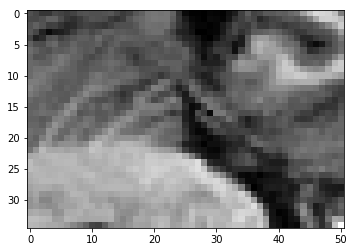

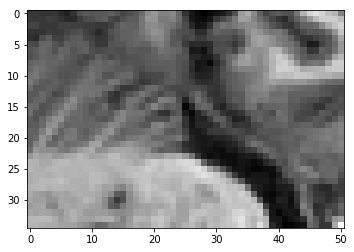

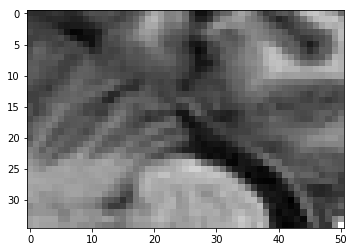

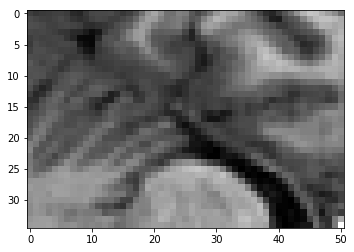

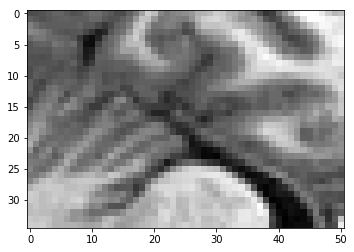

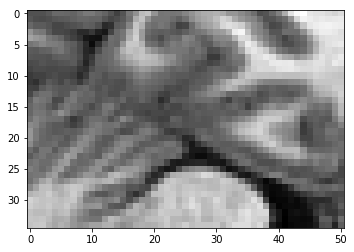

In [22]:
for item in batch['input']:
    plt.imshow(item.squeeze(0),cmap = 'gray')
    plt.show()

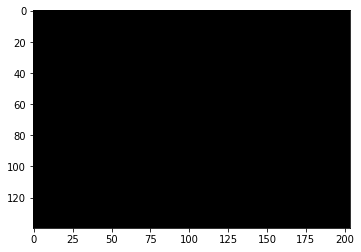

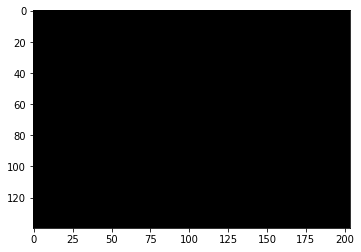

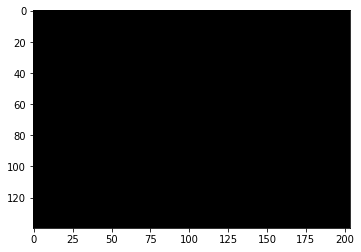

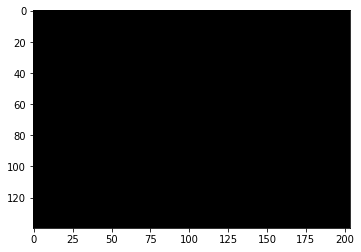

In [28]:
for item in batch['gt']:
    plt.imshow(item.squeeze(0),cmap = 'gray')
    plt.show()

In [23]:
train_transform = transforms.Compose([
        mt_transforms.Resample(0.25, 0.25),
        mt_transforms.ElasticTransform(alpha_range=(40.0, 60.0),
                                       sigma_range=(2.5, 4.0),
                                       p=0.3),
        mt_transforms.ToTensor()]
)

In [24]:
train_dataset = mt_datasets.MRI2DSegmentationDataset(filename_pairs,transform=train_transform)

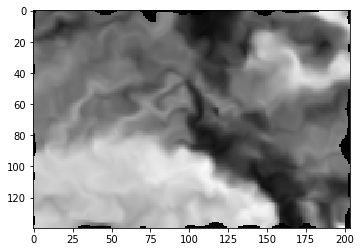

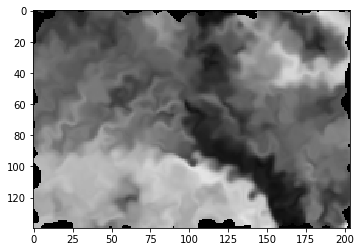

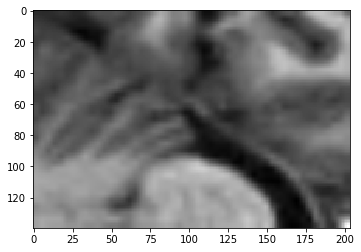

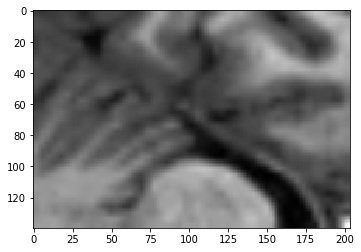

In [26]:
dataloader = DataLoader(train_dataset, batch_size=4,collate_fn=mt_datasets.mt_collate)
batch = next(iter(dataloader))
for item in batch['input']:
    plt.imshow(item.squeeze(0),cmap = 'gray')
    plt.show()

In [ ]:
import numpy as np
import os

from medicaltorch import datasets as mt_datasets
from medicaltorch import transforms as mt_transforms

import torch
from torchvision import transforms
from torch.utils.data import DataLoader
from torch import autograd, optim
import torch.backends.cudnn as cudnn
import torch.nn as nn

import torchvision.utils as vutils

cudnn.benchmark = True
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
#ROOT_DIR = "../Datasets/Task02_Heart/"
ROOT_DIR = "C:\\Users\moona\\Desktop\VeryVeryImUnet\\medicaltorch-master\\medicaltorch-master\\Task09_Spleen\\"
mri_input_filename = os.path.join(ROOT_DIR,'imagesTr',
                                          'spleen_6.nii.gz')
mri_gt_filename = "C:\\Users\moona\\Desktop\VeryVeryImUnet\\medicaltorch-master\\medicaltorch-master\\Task09_Spleen\\labelsTr\\spleen_6.nii.gz"

pair = mt_datasets.SegmentationPair2D(mri_input_filename, mri_gt_filename)
slice_pair = pair.get_pair_slice(55)
input_slice = slice_pair["input"]
gt_slice = slice_pair["gt"]

In [31]:
print(input_slice.shape)

(512, 512)


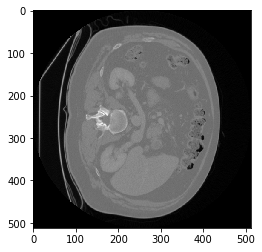

In [32]:
img = input_slice
plt.imshow(img,cmap = 'gray')
plt.show()

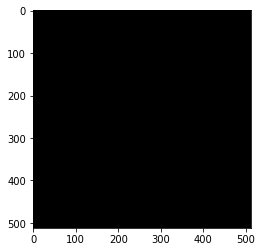

In [33]:
img = gt_slice
plt.imshow(img,cmap = 'gray')
plt.show()

In [34]:
img_data,seg_data = pair.get_pair_data()

In [35]:
img_data.shape

(512, 512, 135)

In [36]:
seg_data.shape

(512, 512, 135)

In [43]:
img_list = os.listdir(os.path.join(ROOT_DIR,'imagesTr'))
label_list = os.listdir(os.path.join(ROOT_DIR,'labelsTr'))

In [44]:
filename_pairs = [(os.path.join(ROOT_DIR,'imagesTr',x),os.path.join(ROOT_DIR,'labelsTr',y)) for x,y in zip(img_list,label_list)]

In [45]:
filename_pairs

[('C:\\Users\\moona\\Desktop\\VeryVeryImUnet\\medicaltorch-master\\medicaltorch-master\\Task09_Spleen\\imagesTr\\spleen_10.nii.gz',
  'C:\\Users\\moona\\Desktop\\VeryVeryImUnet\\medicaltorch-master\\medicaltorch-master\\Task09_Spleen\\labelsTr\\spleen_10.nii.gz'),
 ('C:\\Users\\moona\\Desktop\\VeryVeryImUnet\\medicaltorch-master\\medicaltorch-master\\Task09_Spleen\\imagesTr\\spleen_12.nii.gz',
  'C:\\Users\\moona\\Desktop\\VeryVeryImUnet\\medicaltorch-master\\medicaltorch-master\\Task09_Spleen\\labelsTr\\spleen_12.nii.gz'),
 ('C:\\Users\\moona\\Desktop\\VeryVeryImUnet\\medicaltorch-master\\medicaltorch-master\\Task09_Spleen\\imagesTr\\spleen_13.nii.gz',
  'C:\\Users\\moona\\Desktop\\VeryVeryImUnet\\medicaltorch-master\\medicaltorch-master\\Task09_Spleen\\labelsTr\\spleen_13.nii.gz'),
 ('C:\\Users\\moona\\Desktop\\VeryVeryImUnet\\medicaltorch-master\\medicaltorch-master\\Task09_Spleen\\imagesTr\\spleen_14.nii.gz',
  'C:\\Users\\moona\\Desktop\\VeryVeryImUnet\\medicaltorch-master\\medica

In [46]:
# load data
train_dataset = mt_datasets.MRI2DSegmentationDataset(filename_pairs,transform=mt_transforms.ToTensor())

In [47]:
type(train_dataset)

medicaltorch.datasets.MRI2DSegmentationDataset

In [48]:
print(len(train_dataset))

3650


In [49]:
# sample of the training dataset
train_dataset[0]

{'input': tensor([[[-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
          [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
          [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
          ...,
          [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
          [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
          [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.]]]),
 'gt': tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 'input_metadata': <medicaltorch.datasets.SampleMetadata at 0x1bee43b3a20>,
 'gt_metadata': <medicaltorch.datasets.SampleMetadata at 0x1bee43b3c50>}

In [50]:
# PyTorch data loader
dataloader = DataLoader(train_dataset, batch_size=2,collate_fn=mt_datasets.mt_collate)
batch = next(iter(dataloader))

In [51]:
batch

{'input': tensor([[[[-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
           [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
           [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
           ...,
           [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
           [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
           [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.]]],
 
 
         [[[-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
           [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
           [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
           ...,
           [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
           [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
           [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.]]]]),
 'gt': tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
          

In [52]:
batch['input'].size()

torch.Size([2, 1, 512, 512])

In [53]:
batch['gt'].size()

torch.Size([2, 1, 512, 512])

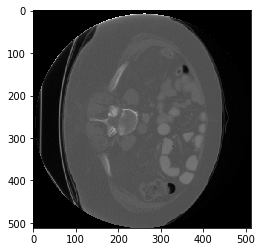

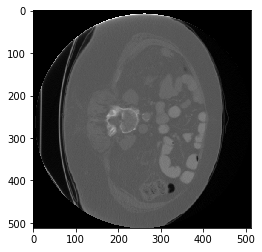

In [54]:
for item in batch['input']:
    plt.imshow(item.squeeze(0),cmap = 'gray')
    plt.show()

In [55]:
train_transform = transforms.Compose([
        mt_transforms.Resample(0.25, 0.25),
        mt_transforms.ElasticTransform(alpha_range=(40.0, 60.0),
                                       sigma_range=(2.5, 4.0),
                                       p=0.3),
        mt_transforms.ToTensor()]
)

In [56]:
train_dataset = mt_datasets.MRI2DSegmentationDataset(filename_pairs,transform=train_transform)

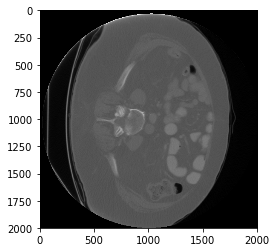

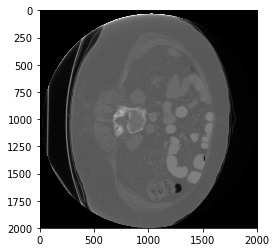

In [57]:
dataloader = DataLoader(train_dataset, batch_size=2,collate_fn=mt_datasets.mt_collate)
batch = next(iter(dataloader))
for item in batch['input']:
    plt.imshow(item.squeeze(0),cmap = 'gray')
    plt.show()

In [ ]:
import numpy as np
import os

from medicaltorch import datasets as mt_datasets
from medicaltorch import transforms as mt_transforms

import torch
from torchvision import transforms
from torch.utils.data import DataLoader
from torch import autograd, optim
import torch.backends.cudnn as cudnn
import torch.nn as nn

import torchvision.utils as vutils

cudnn.benchmark = True
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
#ROOT_DIR = "../Datasets/Task02_Heart/"
ROOT_DIR = "C:\\Users\\moona\\Desktop\\VeryVeryImUnet\\medicaltorch-master\\medicaltorch-master\\Task10_Colon-003\\Task10_Colon"
mri_input_filename = os.path.join(ROOT_DIR,'imagesTr',
                                          'colon_009.nii.gz')
mri_gt_filename = "C:\\Users\\moona\\Desktop\\VeryVeryImUnet\\medicaltorch-master\\medicaltorch-master\\Task10_Colon-003\\Task10_Colon\\labelsTr\\colon_009.nii.gz"

pair = mt_datasets.SegmentationPair2D(mri_input_filename, mri_gt_filename)
slice_pair = pair.get_pair_slice(55)
input_slice = slice_pair["input"]
gt_slice = slice_pair["gt"]

In [59]:
print(input_slice.shape)

(512, 512)


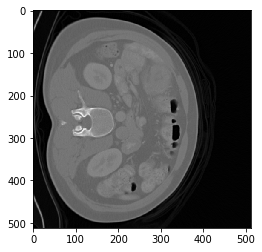

In [60]:
img = input_slice
plt.imshow(img,cmap = 'gray')
plt.show()

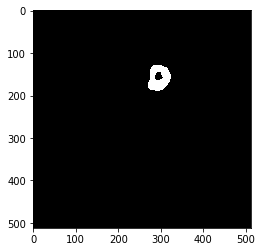

In [61]:
img = gt_slice
plt.imshow(img,cmap = 'gray')
plt.show()

In [62]:
img_data,seg_data = pair.get_pair_data()

In [63]:
img_data.shape

(512, 512, 90)

In [64]:
seg_data.shape

(512, 512, 90)

In [65]:
img_list = os.listdir(os.path.join(ROOT_DIR,'imagesTr'))
label_list = os.listdir(os.path.join(ROOT_DIR,'labelsTr'))

In [66]:
filename_pairs = [(os.path.join(ROOT_DIR,'imagesTr',x),os.path.join(ROOT_DIR,'labelsTr',y)) for x,y in zip(img_list,label_list)]

In [67]:
filename_pairs

[('C:\\Users\\moona\\Desktop\\VeryVeryImUnet\\medicaltorch-master\\medicaltorch-master\\Task10_Colon-003\\Task10_Colon\\imagesTr\\colon_001.nii.gz',
  'C:\\Users\\moona\\Desktop\\VeryVeryImUnet\\medicaltorch-master\\medicaltorch-master\\Task10_Colon-003\\Task10_Colon\\labelsTr\\colon_001.nii.gz'),
 ('C:\\Users\\moona\\Desktop\\VeryVeryImUnet\\medicaltorch-master\\medicaltorch-master\\Task10_Colon-003\\Task10_Colon\\imagesTr\\colon_005.nii.gz',
  'C:\\Users\\moona\\Desktop\\VeryVeryImUnet\\medicaltorch-master\\medicaltorch-master\\Task10_Colon-003\\Task10_Colon\\labelsTr\\colon_005.nii.gz'),
 ('C:\\Users\\moona\\Desktop\\VeryVeryImUnet\\medicaltorch-master\\medicaltorch-master\\Task10_Colon-003\\Task10_Colon\\imagesTr\\colon_006.nii.gz',
  'C:\\Users\\moona\\Desktop\\VeryVeryImUnet\\medicaltorch-master\\medicaltorch-master\\Task10_Colon-003\\Task10_Colon\\labelsTr\\colon_006.nii.gz'),
 ('C:\\Users\\moona\\Desktop\\VeryVeryImUnet\\medicaltorch-master\\medicaltorch-master\\Task10_Colon-00

In [68]:
# load data
train_dataset = mt_datasets.MRI2DSegmentationDataset(filename_pairs,transform=mt_transforms.ToTensor())

In [69]:
type(train_dataset)

medicaltorch.datasets.MRI2DSegmentationDataset

In [70]:
print(len(train_dataset))

13486


In [71]:
# sample of the training dataset
train_dataset[0]

{'input': tensor([[[-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
          [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
          [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
          ...,
          [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
          [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
          [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.]]]),
 'gt': tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 'input_metadata': <medicaltorch.datasets.SampleMetadata at 0x1bee422d5f8>,
 'gt_metadata': <medicaltorch.datasets.SampleMetadata at 0x1bee422de10>}

In [72]:
# PyTorch data loader
dataloader = DataLoader(train_dataset, batch_size=3,collate_fn=mt_datasets.mt_collate)
batch = next(iter(dataloader))

In [73]:
batch

{'input': tensor([[[[-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
           [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
           [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
           ...,
           [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
           [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
           [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.]]],
 
 
         [[[-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
           [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
           [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
           ...,
           [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
           [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
           [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.]]],
 
 
         [[[-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
           [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
         

In [74]:
batch['input'].size()

torch.Size([3, 1, 512, 512])

In [75]:
batch['gt'].size()

torch.Size([3, 1, 512, 512])

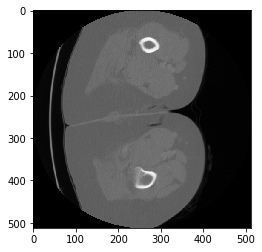

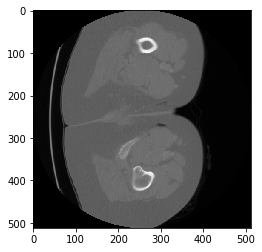

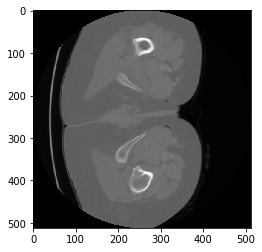

In [81]:
for item in batch['input']:
    plt.imshow(item.squeeze(0),cmap = 'gray')
    plt.show()

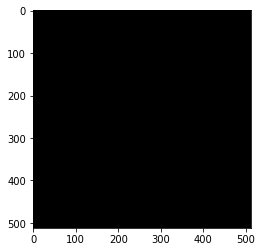

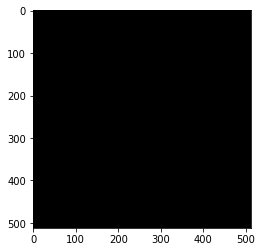

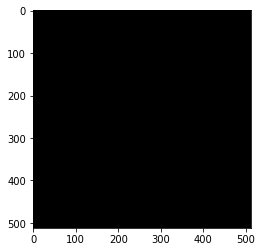

In [80]:
for item in batch['gt']:
    plt.imshow(item.squeeze(0),cmap = 'gray')
    plt.show()

In [82]:
train_transform = transforms.Compose([
        mt_transforms.Resample(0.25, 0.25),
        mt_transforms.ElasticTransform(alpha_range=(40.0, 60.0),
                                       sigma_range=(2.5, 4.0),
                                       p=0.3),
        mt_transforms.ToTensor()]
)

In [83]:
train_dataset = mt_datasets.MRI2DSegmentationDataset(filename_pairs,transform=train_transform)

In [ ]:
# design model unet for our dataset

In [86]:
from collections import defaultdict
import time
import os

import numpy as np

from tqdm import tqdm

from tensorboardX import SummaryWriter
#pip install tensorboardX

from medicaltorch import datasets as mt_datasets
from medicaltorch import models as mt_models
from medicaltorch import transforms as mt_transforms
from medicaltorch import losses as mt_losses
from medicaltorch import metrics as mt_metrics
from medicaltorch import filters as mt_filters

import torch
from torchvision import transforms
from torch.utils.data import DataLoader
from torch import autograd, optim
import torch.backends.cudnn as cudnn
import torch.nn as nn

import torchvision.utils as vutils

cudnn.benchmark = True

In [87]:
def threshold_predictions(predictions, thr=0.999):
    thresholded_preds = predictions[:]
    low_values_indices = thresholded_preds < thr
    thresholded_preds[low_values_indices] = 0
    low_values_indices = thresholded_preds >= thr
    thresholded_preds[low_values_indices] = 1
    return thresholded_preds

In [88]:
train_transform = transforms.Compose([
        mt_transforms.CenterCrop2D((200, 200)),
        mt_transforms.ElasticTransform(alpha_range=(28.0, 30.0),
                                       sigma_range=(3.5, 4.0),
                                       p=0.3),
        mt_transforms.RandomAffine(degrees=4.6,
                                   scale=(0.98, 1.02),
                                   translate=(0.03, 0.03)),
        mt_transforms.RandomTensorChannelShift((-0.10, 0.10)),
        mt_transforms.ToTensor(),
        mt_transforms.NormalizeInstance(),
    ])

In [89]:
 val_transform = transforms.Compose([
        mt_transforms.CenterCrop2D((200, 200)),
        mt_transforms.ToTensor(),
        mt_transforms.NormalizeInstance(),
    ])

In [94]:
train_dataset = mt_datasets.MRI2DSegmentationDataset(filename_pairs,
                                                     transform=train_transform,
                                                     slice_filter_fn=mt_filters.SliceFilter())

In [92]:
print(dir(train_dataset))

['__add__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_load_filenames', '_prepare_indexes', 'cache', 'canonical', 'compute_mean_std', 'filename_pairs', 'handlers', 'indexes', 'set_transform', 'slice_axis', 'slice_filter_fn', 'transform']


In [93]:
type(train_dataset)

medicaltorch.datasets.MRI2DSegmentationDataset

In [ ]:
dataset_val = mt_datasets.MRI2DSegmentationDataset(filename_pairs,
                                                     transform=train_transform,
                                                     subj_ids=range(9, 11),
                                                     slice_filter_fn=mt_filters.SliceFilter())

In [ ]:
gmdataset_train = mt_datasets.SCGMChallenge2DTrain(root_dir="../data",
                                                       subj_ids=range(1, 9),
                                                       transform=train_transform,
                                                       slice_filter_fn=mt_filters.SliceFilter())

    # Here we assume that the SC GM Challenge data is inside the folder
    # "../data" and it was previously resampled.
    gmdataset_val = mt_datasets.SCGMChallenge2DTrain(root_dir="../data",
                                                     subj_ids=range(9, 11),
                                                     transform=val_transform)